In [1]:
from kunal import *

In [2]:
x = np.linspace(0,50,501)

In [3]:
print(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [4]:
y = np.sin(x)

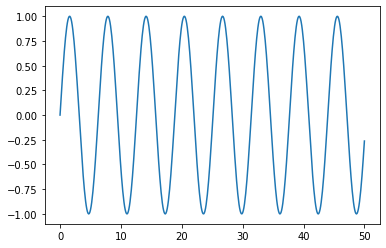

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data=y,index=x,columns=["sine"])

In [7]:
df.head()

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


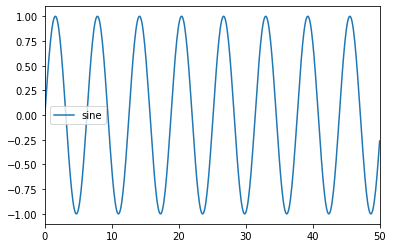

In [8]:
df.plot()

### Train Test Split 

##### Train test split in RNN is different from train test split in ANN or any other machine learning model

In [9]:
test_percent = 0.1

In [10]:
# to check the cut off points
len(df)

501

In [11]:
test_point = np.round(len(df)*test_percent)

In [12]:
test_point

50.0

In [13]:
test_index = int(len(df) - test_point)

In [14]:
train = df.iloc[:test_index]

In [15]:
test = df.iloc[test_index:]

In [16]:
len(test),len(train)

(50, 451)

#### Scaling the data
* Since we feed the ouput label as the input to the next time stamp, we need to scale the label data.

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = mms.transform(train)

In [19]:
scaled_test = mms.transform(test)

### Using TimeSeriesGenerator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 50
batch_size = 1
# generally the batch_size of 1 performs really well in time series analysis

# scaled_train data is used in place of both x and y since we want the time series sequence from the 
# trained data
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length = length, batch_size = batch_size)


In [22]:
len(scaled_train),len(generator)

(451, 401)

In [23]:
X , y = generator[0]

In [24]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [25]:
y

array([[0.02053313]])

### Building the model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

In [27]:
# to define how many features are we actually using in the training,
# since we have only one feature n_features will be equal to 1

n_features = 1


In [28]:
model = Sequential()

# length of the neurons in SimpleRNN should be somewhat related the sequence length, in this case it is 50
model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
# SInce we are using a generator we should use model.fit_generator instead of model.fit

In [49]:
model.fit_generator(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 73s 181ms/step - loss: 0.0073
Epoch 2/5
401/401 [==============================] - 65s 163ms/step - loss: 1.2117e-04
Epoch 3/5
401/401 [==============================] - 67s 166ms/step - loss: 6.2195e-05
Epoch 4/5
401/401 [==============================] - 67s 167ms/step - loss: 1.9807e-04
Epoch 5/5
401/401 [==============================] - 63s 157ms/step - loss: 4.2954e-04


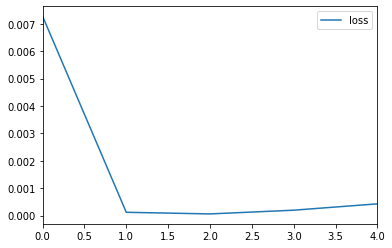

In [50]:
pd.DataFrame(model.history.history).plot()

In [51]:
first_eval_batch = scaled_train[-length:]

In [53]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [54]:
# to make the data compatible with the trained data

first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [55]:
model.predict(first_eval_batch)

array([[0.86446786]], dtype=float32)

In [56]:
scaled_test[0]

array([0.94955134])

In [60]:
# to get the continuous output we need to make use of a for loop and run the above logic

predictions = []

first_eval_batch = scaled_train[-length:]
cur_batch = first_eval_batch.reshape((1,length,n_features))
for i in range(len(test)):
    predicted_value = model.predict(cur_batch)[0]
    predictions.append(predicted_value)
    
    cur_batch = np.append(cur_batch[:,1:,:],[[predicted_value]],axis=1) 
    

In [62]:
predictions

[array([0.86446786], dtype=float32),
 array([0.8552278], dtype=float32),
 array([0.8275441], dtype=float32),
 array([0.7989649], dtype=float32),
 array([0.7803294], dtype=float32),
 array([0.74164414], dtype=float32),
 array([0.6968517], dtype=float32),
 array([0.64292383], dtype=float32),
 array([0.6004625], dtype=float32),
 array([0.5489935], dtype=float32),
 array([0.48948404], dtype=float32),
 array([0.43250686], dtype=float32),
 array([0.3785833], dtype=float32),
 array([0.31690803], dtype=float32),
 array([0.27160767], dtype=float32),
 array([0.22428697], dtype=float32),
 array([0.16810085], dtype=float32),
 array([0.11611928], dtype=float32),
 array([0.06585455], dtype=float32),
 array([0.02752456], dtype=float32),
 array([-0.00737917], dtype=float32),
 array([-0.03094451], dtype=float32),
 array([-0.05354442], dtype=float32),
 array([-0.0784976], dtype=float32),
 array([-0.0850937], dtype=float32),
 array([-0.0931327], dtype=float32),
 array([-0.08732128], dtype=float32),
 arra

In [65]:
# in order to compare the predictions with the scaled test data
true_predictions = mms.inverse_transform(predictions)

In [66]:
true_predictions

array([[ 0.72893164],
       [ 0.71045172],
       [ 0.6550847 ],
       [ 0.5979268 ],
       [ 0.56065608],
       [ 0.48328618],
       [ 0.39370195],
       [ 0.28584714],
       [ 0.20092515],
       [ 0.09798804],
       [-0.02102998],
       [-0.13498343],
       [-0.24282966],
       [-0.36617923],
       [-0.45677923],
       [-0.55141986],
       [-0.66379121],
       [-0.76775351],
       [-0.86828216],
       [-0.94494152],
       [-1.01474843],
       [-1.06187873],
       [-1.10707818],
       [-1.15698414],
       [-1.17017624],
       [-1.18625412],
       [-1.17463137],
       [-1.14914905],
       [-1.12452258],
       [-1.09425759],
       [-1.04953763],
       [-0.99561624],
       [-0.93559823],
       [-0.86924966],
       [-0.80770006],
       [-0.74657809],
       [-0.68140111],
       [-0.60058153],
       [-0.54246252],
       [-0.4869216 ],
       [-0.44247787],
       [-0.42072384],
       [-0.38589587],
       [-0.34354586],
       [-0.32313018],
       [-0

In [67]:
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [68]:
test["predictions"] = true_predictions

C:\Users\KARAN S07\Anaconda3\envs\myDjangoEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
test.head()

,sine,predictions
45.1,0.899097,0.728932
45.2,0.938307,0.710452
45.3,0.968142,0.655085
45.4,0.988304,0.597927
45.5,0.998591,0.560656


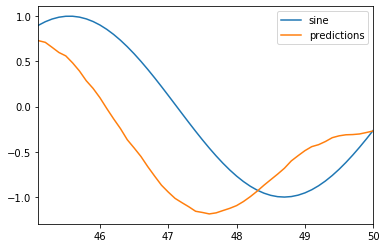

In [72]:
test.plot()

#### Using LSTM

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [33]:
# for RNN's it is preferred to have a quite long epochs if there is noisy data

In [34]:
length = 49

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length, batch_size = 1) 

In [35]:
model = Sequential()

# length of the neurons in SimpleRNN should be somewhat related the sequence length, in this case it is 50
model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [36]:
model.fit_generator(generator,epochs=20,validation_data= validation_generator,
                   callbacks = [early_stop])

Epoch 1/20
402/402 [==============================] - 159s 396ms/step - loss: 0.0116 - val_loss: 0.0011
Epoch 2/20
402/402 [==============================] - 155s 386ms/step - loss: 2.5750e-04 - val_loss: 3.5389e-05
Epoch 3/20
402/402 [==============================] - 174s 432ms/step - loss: 2.8016e-04 - val_loss: 9.8203e-05
Epoch 4/20
402/402 [==============================] - 172s 427ms/step - loss: 5.0845e-04 - val_loss: 5.0373e-07
Epoch 5/20
402/402 [==============================] - 154s 383ms/step - loss: 9.4703e-05 - val_loss: 6.3418e-06
Epoch 6/20
402/402 [==============================] - 161s 401ms/step - loss: 1.9045e-04 - val_loss: 2.4353e-06


In [37]:
predictions = []

first_eval_batch = scaled_train[-length:]
cur_batch = first_eval_batch.reshape((1,length,n_features))
for i in range(len(test)):
    predicted_value = model.predict(cur_batch)[0]
    predictions.append(predicted_value)
    
    cur_batch = np.append(cur_batch[:,1:,:],[[predicted_value]],axis=1) 
    

C:\Users\KARAN S07\Anaconda3\envs\myDjangoEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


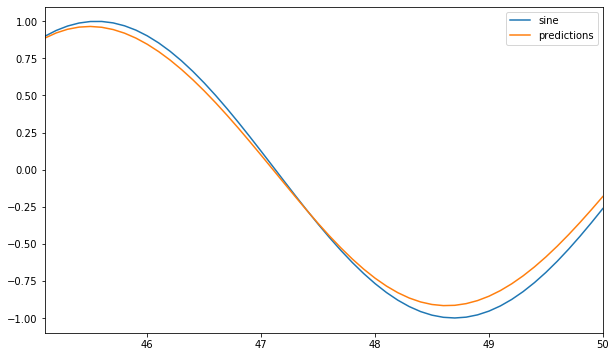

In [39]:
true_predictions = mms.inverse_transform(predictions)
test['predictions'] = true_predictions
test.plot(figsize=(10,6))

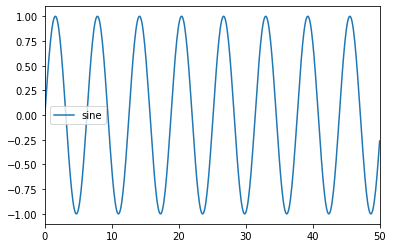

In [40]:
df.plot()


## Forecasting


In [43]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [44]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6
451/451 [==============================] - 176s 391ms/step - loss: 0.0158
Epoch 2/6
451/451 [==============================] - 145s 321ms/step - loss: 3.0081e-04
Epoch 3/6
451/451 [==============================] - 130s 289ms/step - loss: 2.7194e-04
Epoch 4/6
451/451 [==============================] - 127s 283ms/step - loss: 1.4185e-04
Epoch 5/6
451/451 [==============================] - 128s 283ms/step - loss: 1.2121e-04
Epoch 6/6
451/451 [==============================] - 129s 285ms/step - loss: 8.7561e-05


In [63]:
forecast = []

first_eval_batch = scaled_train[-length:]
cur_batch = first_eval_batch.reshape((1,length,n_features))
for i in range(100):
    predicted_value = model.predict(cur_batch)[0]
    forecast.append(predicted_value)
    
    cur_batch = np.append(cur_batch[:,1:,:],[[predicted_value]],axis=1) 
    

In [64]:
forecast = mms.inverse_transform(forecast)

In [65]:
forecast

array([[ 0.78335262],
       [ 0.80152093],
       [ 0.80578346],
       [ 0.7957609 ],
       [ 0.77239511],
       [ 0.73657718],
       [ 0.68918138],
       [ 0.63109986],
       [ 0.56326007],
       [ 0.48664106],
       [ 0.40227935],
       [ 0.31127606],
       [ 0.2147923 ],
       [ 0.11404564],
       [ 0.01029922],
       [-0.09515658],
       [-0.20102258],
       [-0.30601526],
       [-0.4088877 ],
       [-0.50844758],
       [-0.60357106],
       [-0.69320655],
       [-0.77637653],
       [-0.85217473],
       [-0.91976494],
       [-0.97838599],
       [-1.02736253],
       [-1.0661237 ],
       [-1.09422585],
       [-1.11137399],
       [-1.11743855],
       [-1.11246215],
       [-1.09665644],
       [-1.07038927],
       [-1.03416397],
       [-0.98859609],
       [-0.93438884],
       [-0.872311  ],
       [-0.80317905],
       [-0.72784339],
       [-0.64718009],
       [-0.56208585],
       [-0.47347692],
       [-0.38228988],
       [-0.28948339],
       [-0

In [73]:
forecast_index = np.arange(50.1,60.1,step=0.1)

In [74]:
len(forecast),len(forecast_index)

(100, 100)

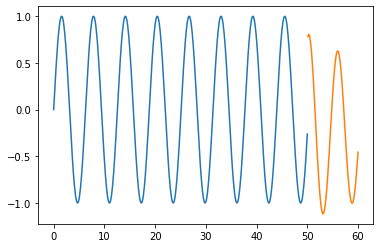

In [75]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)

In [76]:
xdf = df.copy()

In [77]:
new_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['sine'])

In [78]:
new_df.head()

,sine
50.1,0.783353
50.2,0.801521
50.3,0.805783
50.4,0.795761
50.5,0.772395


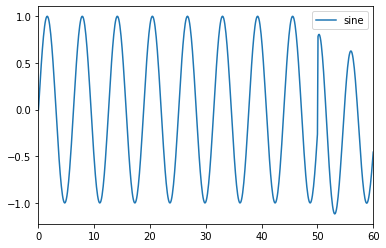

In [79]:
pd.concat([xdf,new_df],axis=0).plot()